# FILTER METHODS, STATISTICAL AND RANKING PROCEDURES

- Statistical Ranking Methods
   - Mutual Information (Information Gain)
   - Chi-square (Fisher Score)
   - Anova (Univariate Tests)
   - Univariate roc-auc / rmse

- Two steps:
     - 1. Rank features based on certain criteria / metric
     - 2. Select features with highest rankings
- Pros and Cons:  Fast  Does not contemplate feature redundancy, **you'll have to screen for duplicated and correlated features in previous steps**
- Evaluate if the variable (X1) is important to discriminate the target (Y), each feature is assessed against the target individually

# 5.1-Mutual-information
# 5.2-Chi-square-test
# 5.3-Univariate-selection
# 5.4-Basic-methods-plus-statistical-pipeline

# 5.1-Mutual-information
## Mutual information

- Mutual information is a measure of the mutual dependence of 2 variables
- quantifies the "amount of information" gained about one variable through observing the values of the other variable
- The mutual information measures the reduction in uncertainty in variable A when variable B is known. 
- To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

- Using Scikit-learn, we can determine the mutual information between a variable and the target using the mutual_info_classif or mutual_info_regression for binary or continuous targets.

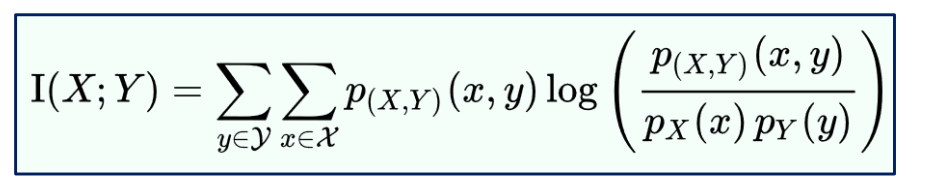

- I is the mutual information
- p(X,Y) is the probability of X and Y occurring together
- p(X) is the probability of X
- p(Y) is the probability of Y
- Determines how similar the joint distribution p(X,Y) is to the products of individual distributions p(X)p(Y)
- If X and Y are independent, their I is zero
- If X is deterministic of Y, the I is the uncertainty in X.

- Mutual Information: Scikit-learn
- Step 1:
   -  determine mutual information between each feature and the target:  Mutual_info_classif
   -  Mutual_info_regression
   -  Rank the features
   
- Step 2:
   - rank the features based on the mutual information: • Feat 2 • Feat 1 • Feat 3
   -  SelectKBest
      -  Selects top k(defined by the user) highest ranking features: • K=1 • Feat 2
   -  SelectPercentile
      -  Selects features in the top percentile. User defines which percentile, e.g., `top 10th
   -  Select the features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import warnings
warnings.filterwarnings('ignore')

## Classification

In [5]:
data = pd.read_csv('../dataset_2.csv')
print(data.shape)
data.head(1)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.53271,3.280834,17.982476,4.404259,2.34991,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417


In [6]:
#  it is good practice to select the features by examining only the training set. And this is to avoid overfit.
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [7]:
### Determine Mutual Information
# calculate the mutual information between the variables and the target
# the smaller the value of the mi, the less information we can infer from the feature about the target
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.50174714e-03, 0.00000000e+00, 1.05048404e-03,
       4.07927011e-04, 5.27156119e-03, 4.94935629e-03, 2.85862652e-03,
       0.00000000e+00, 1.54358766e-04, 7.73582183e-04, 1.06741443e-03,
       8.78102463e-04, 5.12063646e-03, 0.00000000e+00, 1.32197707e-02,
       0.00000000e+00, 0.00000000e+00, 4.22542380e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.45315435e-03, 1.51381008e-03, 2.22363194e-04, 0.00000000e+00,
       4.89396540e-03, 1.70119871e-02, 0.00000000e+00, 2.28833010e-03,
       2.32631270e-05, 1.55303593e-03, 7.47692642e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.10521943e-03,
       1.24372958e-03, 2.09022016e-03, 0.00000000e+00, 6.23877177e-03,
       0.00000000e+00, 8.39431089e-05, 0.00000000e+00, 3.00907098e-03,
       0.00000000e+00, 3.59839371e-03, 4.07113253e-02, 1.60397805e-03,
      

Text(0, 0.5, 'Mutual Information')

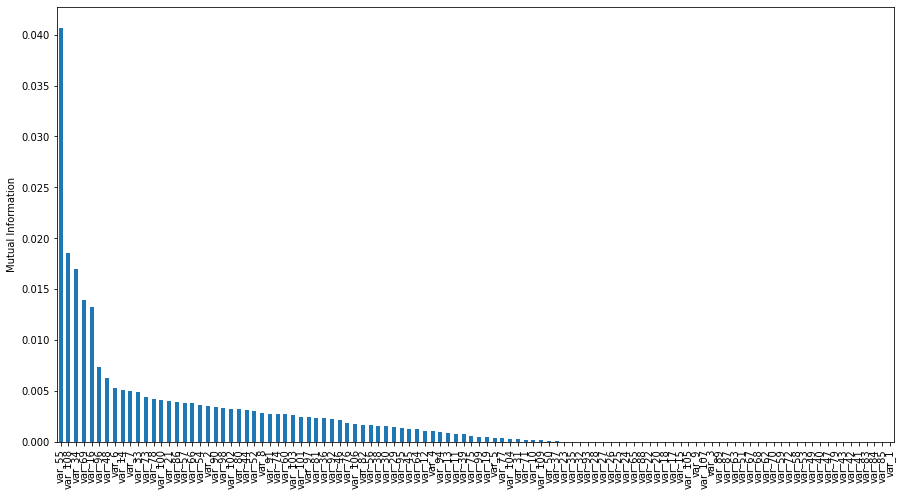

In [12]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(15, 8))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including the MI.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the MI.

Alternatively, if we want to select features based on a MI threshold, we can do it manually.

### Select top k features based on MI

In [13]:
# here we will select the top 10 features based on their mutual information value
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_16', 'var_34', 'var_48', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [14]:
# to remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

****************************
## Regression

In [18]:
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [19]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers, and then you can assess how deterministic they are of the target
# here for simplicity I will use only numerical variables. select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [20]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [21]:
## fill missing values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Text(0, 0.5, 'Mutual Information')

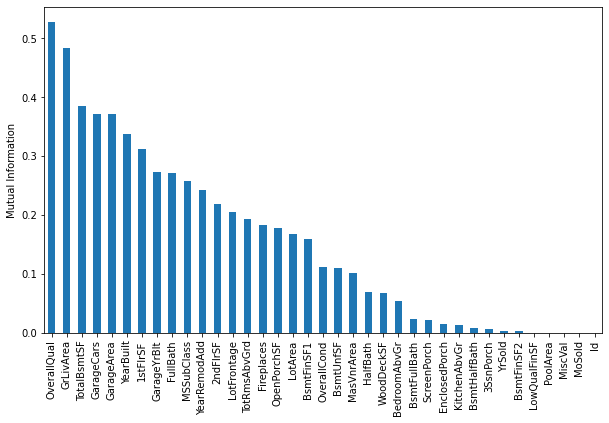

In [23]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)
# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.ylabel('Mutual Information')

In [24]:
# Select the features in the top percentile, Select top 10th percentile features
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)
# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [25]:
# to remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train

array([[7.000e+00, 1.057e+03, 2.034e+03, 2.000e+00],
       [6.000e+00, 1.291e+03, 1.291e+03, 2.000e+00],
       [5.000e+00, 8.580e+02, 8.580e+02, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 1.902e+03, 2.000e+00],
       [7.000e+00, 1.374e+03, 1.557e+03, 2.000e+00],
       [7.000e+00, 1.195e+03, 1.839e+03, 2.000e+00]])

*******************************
********************************
*********************************

# 5.2-Chi-square-test

- Compute chi-squared test between categorical features and classification target.
- To evaluate categorical variables in the data if the target is also categorical (binary or multi-class) (classification)
$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$
- Chi-square is a statistic metric, used to determine if 2 samples of categorical features were extracted from the same population.
- Compares the distributions of the categories extracted from different samples

Chi-square test – main uses:
- Chi-square goodness of fit: Determines if a categorical variable(certain feature) follows a hypothesized distribution
- Chi square test the independence of 2 variables, if 2 variables are assosiated
- Chi-square test compares the distributions of the categories across the variables.


Chi-square for categorical data ,,, If data contains:

-  Categorical variables.
-  Binary or multi-class target.

We can assess the association of the categorical variable with the target, using the chi-squared test.

Chi-square ranking process:

- 1. Create a contingency table between the categorical variable and the target (observed)
- 2. Find the expected distribution
- 3. Calculate the chi-square statistic
- 4. Obtain the p-value

Selection based on Chi-square:

- 1. Rank the features based on the p-value or chi-square
    - 1. The higher the chi-square or the lower the p-value the more predictive the feature
- 2. Select the top ranking features
    - 1. Cut-off for top ranking features is arbitary

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [27]:
variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']
data = pd.read_csv("../titanic.csv", usecols=variables)   # Prepare-Titanic-dataset Notebook
data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [28]:
X_train, X_test, y_train, y_test = train_test_split( data.drop("survived", axis=1), data['survived'], test_size=0.3, random_state=0,)
X_train.shape, X_test.shape

((914, 5), (392, 5))

In [29]:
# contingency table for gender
c = pd.crosstab(y_train, X_train['sex'])
c

sex,female,male
survived,,
0,90,477
1,228,119


In [30]:
chi2_contingency(c)

(233.4328744513778,
 1.0634411614151734e-52,
 1,
 array([[197.27133479, 369.72866521],
        [120.72866521, 226.27133479]]))

In [31]:
# To rank all features
chi_ls = []
for feature in X_train.columns:
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

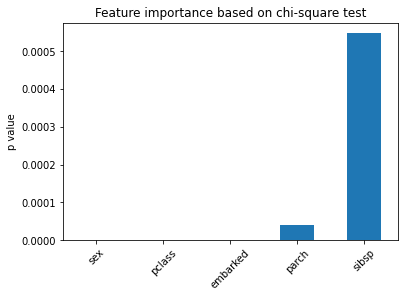

In [32]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [33]:
# select top 3
selected = pd.Series(chi_ls, index=X_train.columns).sort_values( ascending=True)[0:3].index
selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [34]:
# sklearn returns numpy arrays. Convert to dataframe
X_train = X_train[selected]
X_test = X_test[selected]
X_train.head()

,sex,pclass,embarked
840,male,3,S
866,male,3,S
427,male,2,S
478,male,2,C
1305,male,3,S


# Chi-square test Considerations
Chi-square test - Asumptions:

- Observations are independent: each observation can only be assigned to 1 cell in the contingency table.
- Expected frequencies should be greater than 5
- (Some argue that in big contingency tables up to 20% of cells can be smaller than 5, and it is sort of ok.)
- With rare labels, it might be common to have small frequencies  consider grouping categories first.

Fisher exact test

- Chi-square has an approximate c2 distribution.
- In large samples, the approximation is good enough.
- In small samples, it is better to use Fisher’s exact test.
- Fisher’s test is normally used in 2x2 contingency tables.

Sample size effect
- When the the sample size is big, even tiny differences in the frequency become significant.
- We will conclude that there is an association between the categorical variable and the target, when perhaps there isn’t.
- To rank features it is not important

What to do if we also have continuous variables?
- Discretise the continuous variable, and then proceed as if it was categorical
- Beware: the way the intervals are constructed may affect the statistic.